In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import scipy
import tensorflow as tf

In [4]:
img_size = (69,30)

In [5]:
train_dir = './Data'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # 20% of data for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1605 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(69,30,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\dbria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 67, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 33, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 4, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3328)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       213,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,441 (1.03 MB)

 Trainable params: 269,441 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50


c:\Users\dbria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7496 - loss: 0.4410 - val_accuracy: 0.9453 - val_loss: 0.2633
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9375 - loss: 0.2583 - val_accuracy: 0.9375 - val_loss: 0.1446
Epoch 3/50


c:\Users\dbria\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9633 - loss: 0.1831 - val_accuracy: 0.9479 - val_loss: 0.1345
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9688 - loss: 0.1245 - val_accuracy: 0.8750 - val_loss: 0.3747
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9824 - loss: 0.0963 - val_accuracy: 0.9922 - val_loss: 0.0597
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9688 - loss: 0.1667 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9860 - loss: 0.0647 - val_accuracy: 0.9635 - val_loss: 0.1046
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9688 - loss: 0.0415 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9680 - loss: 0.1106 - val_accuracy: 0.9896 - val_loss: 0.0495
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 1.0000 - val_los

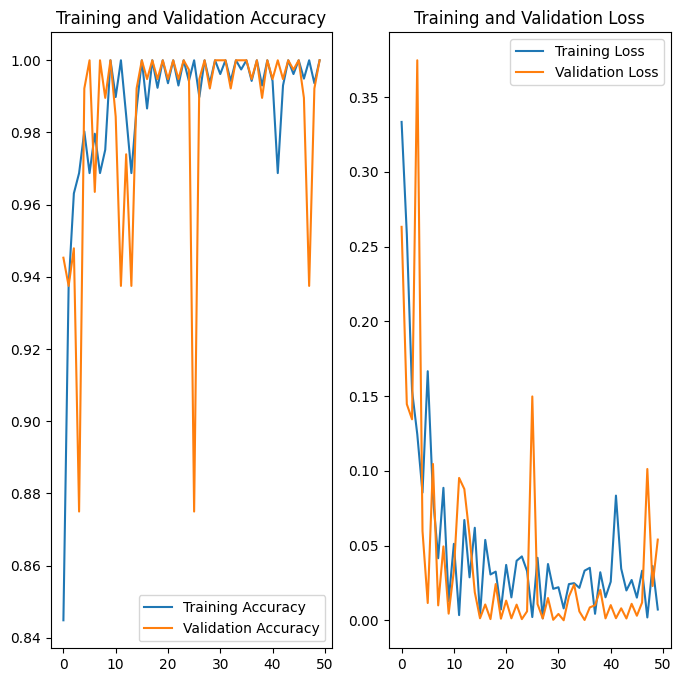

In [8]:
# Plotting training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Save the model
model.save('./Model/parking_space_classifier.h5')

In [12]:
model = tf.keras.models.load_model('./Model/parking_space_classifier.h5')

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to [0, 1] range
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    print(img_array.shape)
    prediction = model.predict(img_array)
    
    if prediction[0] > 0.5:
        return 'Empty'
    else:
        return 'Car'

In [13]:
img_count = 0
failures = 0

for i in range(1500):
    try:
        img_path = f'./Data/car/frame_{i}.jpg'
        result = predict_image(model, img_path)
        print(f'The parking space is: {result}')
        if (result != 'Car'):
            failures += 1
        img_count += 1
    except:
        print('image does not exist')

for i in range(400):
    try:
        img_path = f'./Data/empty/frame_{i}.jpg'
        result = predict_image(model, img_path)
        print(f'The parking space is: {result}')
        if (result != 'Empty'):
            failures += 1
        img_count += 1
    except:
        print('image does not exist')
        
        
print(f'fail rate={failures / img_count}')


image does not exist
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The parking space is: Car
image does not exist
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The parking space is: Car
image does not exist
image does not exist
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The parking space is: Car
image does not exist
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The parking space is: Car
image does not exist
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The parking space is: Car
(1, 69, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The parking space is: Car
(1, 6